In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

df_inventory = pd.read_csv("../Resources/rentalInventory_All.csv")
df_inventory.head()


,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,All Downtown,Manhattan,submarket,4258,4525,4596,4681,4489,4579,4261,...,4547,5148,4942,5630,6147,7112,7611,7934,7816,6434
1,All Midtown,Manhattan,submarket,3065,3207,3242,3415,3120,3115,3029,...,3318,3657,3482,3888,4000,4504,4833,4886,5068,4442
2,All Upper East Side,Manhattan,submarket,2549,2651,2641,2589,2497,2667,2575,...,1910,2084,1829,1993,2173,2562,2811,3014,3092,2617
3,All Upper Manhattan,Manhattan,submarket,846,843,813,738,707,770,754,...,1847,2010,1830,2090,1959,2395,2576,2715,2853,2438
4,All Upper West Side,Manhattan,submarket,2164,2187,2307,2453,2328,2414,2220,...,1615,1790,1752,1936,1911,2279,2530,2602,2563,2128


In [17]:
# Group the data in the DataFrame by the "Borough" column
grouped = df_inventory.groupby("Borough")
# Calculate the sum of each borough
Borough_sums = grouped.sum()
# Reset the index of the new DataFrame, which replaces the original index with a default integer index
Borough_sums_df = Borough_sums.reset_index()
# Drop the "areaName" and "areaType" columns from the DataFrame, leaving only the borough names and their sums
Borough_sums_df = Borough_sums_df.drop(columns=["areaName", "areaType"])
Borough_sums_df.head()

,Borough,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09
0,Bronx,330,366,372,308,276,238,214,217,162,...,1924,2003,1972,2168,1893,2058,1897,1896,2245,1937
1,Brooklyn,5460,5367,5562,5566,5062,4911,4731,4743,4152,...,26174,28936,27852,31147,28509,33677,36762,37770,39003,32720
2,Manhattan,38706,40317,40889,41712,39485,40713,38639,36428,32000,...,39852,44212,41646,46761,48705,56675,61223,63610,64334,54313
3,Queens,1686,1761,1797,1701,1614,1644,1590,1464,1578,...,11304,12945,11970,13032,11547,12186,12579,13539,13623,12054
4,Staten Island,7,5,6,6,2,3,2,3,5,...,90,95,96,105,85,69,82,61,85,64


In [18]:
# Group the data in the 'Borough_sums_df' DataFrame by the year 
df_yearly_sum = Borough_sums_df.groupby(Borough_sums_df.columns.str.extract('(\d{4})', expand=False), axis=1).sum()
# Convert the column names to integers assuming they represent years
df_yearly_sum.columns = df_yearly_sum.columns.astype(int)
# Insert a new column "Borough" at the beginning of the DataFrame
df_yearly_sum.insert(0, "Borough", Borough_sums_df["Borough"])
df_yearly_sum.head()

,Borough,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Bronx,3087,3674,5419,5462,10815,17510,19086,19836,20977,24007,17403,21560,22666,18069
1,Brooklyn,59006,65757,83105,136910,275336,393622,420765,523610,548214,487618,629297,580416,359197,296376
2,Manhattan,441207,395231,456434,576566,697721,752606,806772,807096,713479,675302,1013629,806908,506199,481479
3,Queens,19596,18369,30753,40171,89093,121867,140332,195872,186911,177469,205331,232639,146431,113475
4,Staten Island,55,57,139,331,522,925,1041,982,1031,812,481,627,925,742


In [19]:
# Save the DataFrame as a CSV file in the "Data File Repository" directory one level up
output_folder = '../Data File Repository'
output_file_path = os.path.join(output_folder, 'Rental_Inventory_DF.csv')
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
df_yearly_sum.to_csv(output_file_path, index=False)

In [20]:
#Create the x and y axis lists
time = np.arange(2010, 2024, 1)
bronx_sum = [3087,3674,5419,5462,10815,17510,19086,19836,20977,24007,17403,21560,22666,18069]
brooklyn_sum = [59006,65757,83105,136910,275336,393622,420765,523610,548214,487618,629297,580416,359197,296376]
manhattan_sum = [441207,395231,456434,576566,697721,752606,806772,807096,713479,675302,1013629,806908,506199,481479]
queens_sum = [19596,18369,30753,40171,89093,121867,140332,195872,186911,177469,205331,232639,146431,113475]
staten_island_sum = [55,57,139,331,522,925,1041,982,1031,812,481,627,925,742]

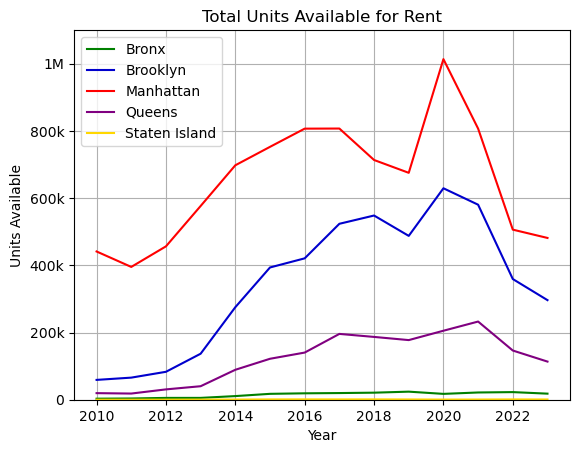

In [21]:
#Plot the chart, add styling
bronx_line = plt.plot(time, bronx_sum, color="green", label="Bronx")
brooklyn_line = plt.plot(time, brooklyn_sum, color="mediumblue", label="Brooklyn")
manhattan_line = plt.plot(time, manhattan_sum, color="red", label="Manhattan")
queens_line = plt.plot(time, queens_sum, color="purple", label="Queens")
staten_island_line = plt.plot(time, staten_island_sum, color="gold", label="Staten Island")

#Labels to axes
plt.title("Total Units Available for Rent")
plt.xlabel("Year")
plt.ylabel("Units Available")
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000], ["0", "200k", "400k", "600k", "800k", "1M"])
plt.ylim(0, 1100000)
plt.grid()

#Create Legend for chart
plt.legend()

#Save figure output to folder
output_folder = ("../Charts and Graphs Output")
output_file_path_total_units_available = os.path.join(output_folder, "total_units_available_all_years.png")
plt.savefig(output_file_path_total_units_available)

In [22]:
#Show the plot
plt.show()